# Analysis

In this notebook we will analyse the models that we created.

The analysis consists of:

1) comparing the perplexity and the accuracy between the rationalized and non-rationalized model 

2) Checking the change in perplexity when removing even more from the rational

3) Checking the distribution of rationals

4) Qualitative analysis of the some examples

## Setup

In [1]:
#First we fix the relative imports
import os
import sys
# M
# module_path = os.path.abspath(os.path.join('..'))
# if module_path not in sys.path:
#     sys.path.append(module_path)
    
#Make sure we are in the top folder. 
os.chdir(os.path.join('..'))

In [2]:
### We load the models based on the configs for analysis. 
from utils.analysis import parse_config_for_analysis
config_path = 'configs/simple_RE_config_shared.yml'

loaded_info = parse_config_for_analysis(config_path)

lm_RE = loaded_info["lightning_language_model_RE"].to("cpu").eval()
lm = loaded_info["lightning_language_model_no_RE"].to("cpu").eval()
tokenizer = loaded_info["tokenizer"]
dataloader_test = loaded_info["dataloader_test"]

C:\Users\gerso\projects\rational-dialog-model\utils\analysis.py:24: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


./daily_dialog/tokenizer.json


Using custom data configuration default
Reusing dataset daily_dialog (C:\Users\gerso\.cache\huggingface\datasets\daily_dialog\default\1.0.0\c03444008e9508b8b76f1f6793742d37d5e5f83364f8d573c2747bff435ea55c)
Using custom data configuration default
Reusing dataset daily_dialog (C:\Users\gerso\.cache\huggingface\datasets\daily_dialog\default\1.0.0\c03444008e9508b8b76f1f6793742d37d5e5f83364f8d573c2747bff435ea55c)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores


load pretrained_model:  ./models/small_lm.pt
load pretrained_model:  ./models/small_lm_shared_rationalized.pt
2


## Perplexity and Accuracy

In [3]:
### First thing we compare the perplexity and accuracy on the testset.
from utils.analysis import get_results, get_results_RE


lm_RE_result = get_results_RE(lm_RE, dataloader_test, 1)
lm_result = get_results(lm, dataloader_test)
print(lm_RE_result)
print(lm_result)


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:03<00:00,  5.07it/s]

{'mean_acc': {'mean': 0.09956800192594528, 'std': 0.0}, 'mean_perplexity': {'mean': 43.73969650268555, 'std': 0.0}, 'mean_mask_percentage': {'mean': 0.6138044595718384, 'std': 0.0}}
{'mean_acc': tensor(0.3828), 'mean_perplexity': tensor(25.8828, grad_fn=<AddBackward0>), 'mean_mask_percentage': 0}


## Change in perplexity TODO

In [4]:
# ### Next we test what happens if we check te change in perplexity of the RE. 
# from utils.analysis import calc_change_in_perplexity_experiment
# change_in_perplexity = calc_change_in_perplexity_experiment(lm_RE, dataloader_test, n_experiments=10, n_extra_mask=1)
# change_in_perplexity

## Distribution of mask

In [5]:
from utils.analysis import rational_analysis

#Make sure we use the hard (binarized) values
lm_RE.hard = True
rational_distributions = rational_analysis(lm_RE, dataloader_test)
print(rational_distributions)

{'abs_average': tensor(41.9363), 'rel_average': tensor(0.5137), 'abs_pos_count': Counter({0.0: 28336, 10.0: 302, 7.0: 300, 3.0: 293, 6.0: 292, 5.0: 290, 4.0: 286, 9.0: 278, 8.0: 275, 13.0: 275, 18.0: 269, 17.0: 269, 21.0: 267, 19.0: 262, 12.0: 258, 15.0: 257, 14.0: 255, 26.0: 248, 16.0: 247, 25.0: 246, 20.0: 239, 30.0: 235, 23.0: 233, 22.0: 231, 28.0: 230, 29.0: 230, 11.0: 228, 1.0: 227, 24.0: 226, 2.0: 216, 38.0: 212, 35.0: 212, 27.0: 210, 34.0: 210, 31.0: 210, 39.0: 209, 32.0: 206, 33.0: 206, 41.0: 203, 46.0: 191, 40.0: 190, 42.0: 190, 36.0: 188, 37.0: 187, 47.0: 186, 54.0: 183, 44.0: 181, 53.0: 178, 45.0: 177, 50.0: 177, 43.0: 173, 51.0: 171, 52.0: 162, 48.0: 159, 59.0: 159, 61.0: 158, 49.0: 155, 62.0: 154, 66.0: 152, 56.0: 147, 63.0: 145, 58.0: 145, 68.0: 145, 69.0: 143, 60.0: 137, 57.0: 136, 55.0: 134, 67.0: 134, 76.0: 134, 65.0: 133, 70.0: 129, 79.0: 127, 78.0: 126, 73.0: 125, 64.0: 123, 74.0: 122, 71.0: 122, 75.0: 121, 72.0: 120, 77.0: 118, 82.0: 116, 86.0: 115, 80.0: 115, 81.0:

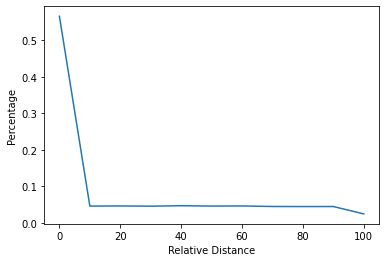

In [6]:
import matplotlib.pyplot as plt
relative_counts = rational_distributions["rel_pos_count"]
total = sum(relative_counts.values())
X = [int(k) for k in relative_counts.keys()] 
Y = [r/total for r in relative_counts.values()]

pairs = sorted([(x,y) for x,y in zip(X, Y)], key=lambda p: p[0])
plt.xlabel
X_sorted = [p[0] for p in pairs]
Y_sorted = [p[1] for p in pairs]
plt.xlabel("Relative Distance")
plt.ylabel("Percentage")
plt.plot(X_sorted, Y_sorted, "")


<BarContainer object of 11 artists>

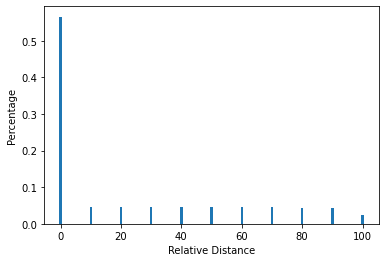

In [7]:
plt.xlabel("Relative Distance")
plt.ylabel("Percentage")
plt.bar(X, Y)

## Analysing some examples

In [8]:
examples = ["How are you doing?", "What did you do today?", "How's work?", "Would you like some coffee?"]

In [9]:
## First with greedy rationals
completed_dialogues_chance = lm_RE.complete_dialogues(examples, total_length=40, greedy_rationals=False)
completed_dialogues_greedy = lm_RE.complete_dialogues(examples, total_length=40, greedy_rationals=True)

In [10]:
from utils.analysis import pretty_print_completed_dialogues

In [11]:
pretty_print_completed_dialogues(completed_dialogues_greedy)

context ----> response
how are you doing ? ------> [SEP] i ’ m going for a long time .
how are you doing [UNK] [UNK] i [UNK] m [UNK] for a long time [UNK] ------> ? [SEP] well , i ’ m glad to hear
how [UNK] you [UNK] ? [SEP] i ’ m [UNK] for a long [UNK] . ? [UNK] well [UNK] i ’ m glad to [UNK] ------> with me , but i ’ ve got all the
how are [UNK] [UNK] [UNK] [SEP] i ’ [UNK] [UNK] [UNK] [UNK] [UNK] time . [UNK] [SEP] [UNK] , [UNK] ’ m glad to [UNK] with me , [UNK] i [UNK] [UNK] [UNK] [UNK] the ------> ater for your family . [SEP] well . i hope
what did you do today ? ------> [SEP] i would like to check on my office .
what did you [UNK] today [UNK] [SEP] [UNK] [UNK] [UNK] to check on my [UNK] . ------> the interview office , i want to get into this
what [UNK] you do [UNK] ? [SEP] i would like to [UNK] on [UNK] office [UNK] the [UNK] [UNK] [UNK] i [UNK] [UNK] [UNK] [UNK] this ------> afternoon , but i would do if i could help
what did you do today ? [SEP] i [UNK] [UNK] [UNK] check [UNK] 

In [12]:
pretty_print_completed_dialogues(completed_dialogues_chance)

context ----> response
how are you doing ? ------> [SEP] i was really busy in this book , but
how [UNK] [UNK] [UNK] ? [SEP] [UNK] [UNK] really [UNK] [UNK] this [UNK] , [UNK] ------> s in the country . i think it is so
[UNK] [UNK] [UNK] [UNK] ? [UNK] i was [UNK] [UNK] in [UNK] book , but [UNK] in [UNK] country . [UNK] [UNK] it is [UNK] ------> , i ' m not sure . [SEP] what did
how are you [UNK] ? [UNK] [UNK] [UNK] really [UNK] in this book , [UNK]s in [UNK] country [UNK] [UNK] think [UNK] is so , i ' [UNK] not sure . [SEP] [UNK] [UNK] ------> , i know you will have a look at the
what did you do today ? ------> [SEP] it ' s too bad . i ’ ll
what did you do [UNK] ? [SEP] it ' [UNK] [UNK] [UNK] . [UNK] [UNK] ll ------> be a little tip ! the weather is so
what did you [UNK] [UNK] ? [SEP] [UNK] ' [UNK] too [UNK] [UNK] [UNK] ’ ll be a [UNK] [UNK]ip [UNK] the weather is so ------> good . [SEP] i ' m glad to hear that
[UNK] did [UNK] [UNK] today [UNK] [SEP] it [UNK] s too bad [UNK] i ’ [UNK] [U